In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import FactorAnalysis
import seaborn as sn
from sklearn.metrics import accuracy_score, classification_report, f1_score, fbeta_score, hamming_loss, jaccard_score, log_loss, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, zero_one_loss

In [2]:
warnings.filterwarnings('ignore')
df_train = pd.read_csv("Training.csv")
df_test = pd.read_csv("Testing.csv")
df = df_train.append(df_test, ignore_index=True)

In [3]:
print(df.shape)
df.head()

(4961, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Check for missing values/outliers

In [4]:
for col in df.columns:
    print(col, df[col].unique())

itching [1 0]
skin_rash [1 0]
nodal_skin_eruptions [1 0]
continuous_sneezing [0 1]
shivering [0 1]
chills [0 1]
joint_pain [0 1]
stomach_pain [0 1]
acidity [0 1]
ulcers_on_tongue [0 1]
muscle_wasting [0 1]
vomiting [0 1]
burning_micturition [0 1]
spotting_ urination [0 1]
fatigue [0 1]
weight_gain [0 1]
anxiety [0 1]
cold_hands_and_feets [0 1]
mood_swings [0 1]
weight_loss [0 1]
restlessness [0 1]
lethargy [0 1]
patches_in_throat [0 1]
irregular_sugar_level [0 1]
cough [0 1]
high_fever [0 1]
sunken_eyes [0 1]
breathlessness [0 1]
sweating [0 1]
dehydration [0 1]
indigestion [0 1]
headache [0 1]
yellowish_skin [0 1]
dark_urine [0 1]
nausea [0 1]
loss_of_appetite [0 1]
pain_behind_the_eyes [0 1]
back_pain [0 1]
constipation [0 1]
abdominal_pain [0 1]
diarrhoea [0 1]
mild_fever [0 1]
yellow_urine [0 1]
yellowing_of_eyes [0 1]
acute_liver_failure [0 1]
fluid_overload [0]
swelling_of_stomach [0 1]
swelled_lymph_nodes [0 1]
malaise [0 1]
blurred_and_distorted_vision [0 1]
phlegm [0 1]
throat

## Dealing with cathegorical variables

In [5]:
diseases = df['prognosis'].unique().tolist()
cleanup = {"prognosis" : {"Fungal infection" : 1, "Allergy": 2, "GERD" : 3, "Chronic cholestasis" : 4, 
                          "Chronic cholestasis" : 5, "Drug Reaction" : 6, "Peptic ulcer diseae" : 7, "AIDS" : 8, 
                          "Diabetes " : 9, "Gastroenteritis" : 10, "Bronchial Asthma" : 11, "Hypertension " : 12, 
                          "Migraine" : 13, "Cervical spondylosis" : 14, "Paralysis (brain hemorrhage)" : 15, "Jaundice" : 16,
                          "Malaria" : 17, "Chicken pox": 18, "Dengue" : 19, "Typhoid" : 20, "hepatitis A" : 21, 
                          "Hepatitis B" : 22, "Hepatitis C" : 23, "Hepatitis D" : 24, "Hepatitis E" : 25,
                          "Alcoholic hepatitis" : 26, "Tuberculosis" : 27, "Common Cold" : 28, "Pneumonia" : 29,
                          "Dimorphic hemmorhoids(piles)" : 30, "Heart attack" : 31, "Varicose veins" : 32, 
                          "Hypothyroidism" : 33, "Hyperthyroidism": 34, "Hypoglycemia" : 35, "Osteoarthristis" : 36, 
                          "Arthritis" : 37, "(vertigo) Paroymsal  Positional Vertigo" : 38, "Acne" : 39,
                          "Urinary tract infection" : 40, "Psoriasis" : 41, "Impetigo": 42}
            }
df.replace(cleanup, inplace=True)
df_train.replace(cleanup, inplace=True)
df_test.replace(cleanup, inplace=True)
print(df['prognosis'].unique())
df.head()

[ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Features selection

In [6]:
def forward_stepwise_selection(X, y, threshold_in=0.01):
    import pandas as pd
    import numpy as np
    import statsmodels.api as sm
    included = list()
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
        if not changed:
            break
    return included

In [7]:
x_train = df_train.loc[:, df_train.columns != 'prognosis']
y_train = df_train['prognosis']
x_test = df_test.loc[:, df_test.columns != 'prognosis']
y_test = df_test['prognosis']
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
prediction = mnb.predict(x_test) 
testing_accuracy = accuracy_score(y_test, prediction)

In [8]:
# forward_stepwise_features = forward_stepwise_selection(x_train, y_train)
# print(forward_stepwise_features)

In [9]:
# x_train = df_train[forward_stepwise_features]
# x_test = df_test[forward_stepwise_features]
# mnb.fit(x_train, y_train)
# prediction = mnb.predict(x_test) 
# testing_accuracy = accuracy_score(y_test, prediction)
# print("Accuracy:  {}".format(testing_accuracy))

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
   

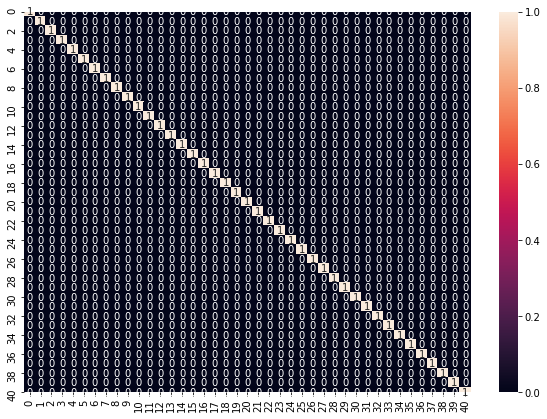

In [12]:
print("Classification report:\n", classification_report(y_test, prediction))
print("Accuracy classification score:  {}".format(testing_accuracy))
print("Balanced F-score:", f1_score(y_test, prediction, average='macro'))
print("Average Hamming loss:", hamming_loss(y_test, prediction))
print("Jaccard similarity coefficient score:", jaccard_score(y_test, prediction, average='macro'))
print("Zero-one classification loss:", zero_one_loss(y_test, prediction))
print("Confusion matrix for each class:\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, prediction))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)